   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          14          10          10          10           8          11   
1          12          12          12          12           9          12   
2          10           8           8           8           4           9   
3          15           8           8           8          13           8   
4           8           9           9           9           9           9   
5           6           8           8           8          10          10   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 12  \
0          14          11          12          12  ...            8   
1          10          11           9           9  ...           11   
2          11          11          12          12  ...           11   
3          11          11           9           9  ...           10   
4          12           8           7           7  ...           14   
5           6          13         

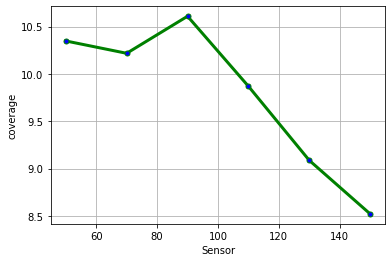

In [1]:
import numpy as np
import pandas as pd
import random
import Module as external
import copy
import matplotlib.pyplot as plt
tar = 50 #int(input("Enter the number of targets:- "))
#sen =  140 #int(input("Enter the number of sensors:- "))
Rsi = 50
grid_size = 150
temp_graph_list = list()
temp_sen_list = list()
for i in range(50,151,20):
    sen = i
    T = np.random.randint(0, grid_size+1, size=(tar, 2))
    S = np.random.randint(0, grid_size+1, size=(sen, 2))
    sink_node = np.random.randint(0, grid_size+1, size=(1, 2))
    dist = external.distTargetSensor(S,T)
    cover_targets= (dist<=Rsi).astype(int)
    not_covered = list()
    ST_map = dict()
    count_map = dict()
    temp1 = np.where(~cover_targets.any(axis=1))[0]
    not_covered = temp1.tolist()
    n = len(cover_targets)
    m = len(cover_targets[0])
    for x in range(n):
        sensors_covering_target = list()
        count = 0
        for y in range(m):
            if(cover_targets[x][y] == 1):
                count = count+1
                count_map[x] = count
                sensors_covering_target.append(y)
                ST_map[x] = sensors_covering_target
    temp_tuple = copy.deepcopy(ST_map)
    min_val = min([len(ST_map[ele]) for ele in ST_map])
    T_critical = []
    for ele in ST_map:
        if len(ST_map[ele]) == min_val:
            T_critical.append(ele)
    S_critical_list=[ST_map[k] for k in T_critical if k in ST_map]
    first_tuple_list = [tuple(lst) for lst in S_critical_list]
    S_critical = set(first_tuple_list)
    S_all = ST_map.keys()
    NC_Target = S_all - T_critical
    SN_critical = [ST_map[k] for k in NC_Target if k in ST_map]
    sensor_map = {}
    for sm in range(m):
        count = 0
        for smg in range(n):
            if(cover_targets[smg][sm] == 1):
                count = count+1
                sensor_map[sm] = count
    target_Set = set()
    sensor_Set = set()
    reserve_Set = set()
    continue_loop = len(T_critical)
    temp_dict = dict()
    while(continue_loop):
        for i in S_critical:
                temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
                if(len(T_critical)==1):
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)
                else:
                    temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)
                    
        for i in S_critical:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)
    remaining_target = tar- ((len(target_Set)) - (len(not_covered)))
    temp1= len(sensor_Set)
    temp2 = len(reserve_Set)
    remaining_sensors = sen -temp1 -temp2
    total_target = set()
    for i in temp_tuple.keys():
        total_target.add(i)
    non_critical_targets = (total_target).difference(target_Set)
    SN = [temp_tuple[k] for k in non_critical_targets if k in temp_tuple]
    continue_loop = len(non_critical_targets)
    temp_dict = dict()
    while(continue_loop):
        for i in SN:
            temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
            temp_noncritical=max(temp_dict, key= lambda x: temp_dict[x])
            sensor_Set.add(temp_noncritical)
                    
        for i in SN:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)
    temp = [t for t in sensor_Set]
    gra = len(temp)
    #print(gra)
    temp_graph_list.append(gra)
    temp_sen_list.append(sen)
df = pd.read_excel('sss.xlsx')
df = df.transpose()
tf = pd.DataFrame(temp_graph_list)
tf =  tf.transpose()
df = df.append(tf)
l=[]
for i in df:
    temp=df[i].mean()
    l.append(temp)
plt.plot(temp_sen_list,l, color='green', linestyle='-', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Sensor')
plt.ylabel('coverage')
plt.grid(True)
plt.show()

In [28]:
df

,0,1,2,3,4,5
Unnamed: 0,14,12,10,15,8,6
Unnamed: 1,10,12,8,8,9,8
Unnamed: 2,10,12,8,8,9,8
Unnamed: 3,10,12,8,8,9,8
Unnamed: 4,8,9,4,13,9,10
Unnamed: 5,11,12,9,8,9,10
Unnamed: 6,14,10,11,11,12,6
Unnamed: 7,11,11,11,11,8,13
Unnamed: 8,12,9,12,9,7,8
Unnamed: 9,12,9,12,9,7,8


In [1]:
sset = {1, 5, 7, 8, 9, 11, 13, 14, 17, 19, 22, 24, 26, 27, 28, 29, 30, 31, 32, 34, 36, 40, 41, 46, 48, 49, 50, 51, 54, 56, 57, 60, 61, 62, 63, 67, 70, 71, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 90, 92, 93, 97, 99, 100, 101, 104, 105, 106, 107, 108, 110, 111, 112, 114, 116, 117, 118, 119, 121, 122, 125, 129, 130, 131, 134, 135, 137, 138, 139, 140, 141, 143, 145, 146, 147}
set_add = set()
for i in range(3):
    set_add.add(i)
print(add)

NameError: name 'add' is not defined